['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
(150, 4)
(105, 4)
(45, 4)
(105,)
(45,)
Confusion Matrix:
[[15  0  0]
 [ 0 11  2]
 [ 0  4 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.73      0.85      0.79        13
           2       0.87      0.76      0.81        17

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45

Confusion Matrix:
[[15  0  0]
 [ 0 12  1]
 [ 0  4 13]]
Classification Report:

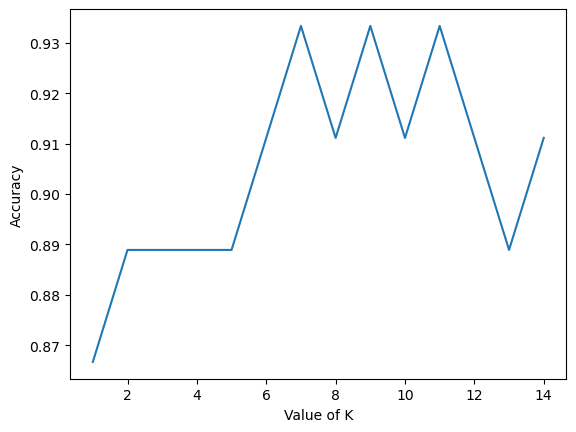

virginica
virginica


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
print(iris.feature_names)

# Print target
print(iris.target)

# Print target names
print(iris.target_names)

# Check the number of observations and features
print(iris.data.shape)

# Split the data into training and testing sets
X = iris.data[:, :4]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Check the shape of train and test objects
print(X_train.shape)
print(X_test.shape)

# Check the shape of new y object
print(y_train.shape)
print(y_test.shape)

# Run K-neighbors Classifier for k = 1 to 15
k_values = range(1, 15)
scores = {}
scores_list = []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    result = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(result)
    result1 = metrics.classification_report(y_test, y_pred)
    print("Classification Report:")
    print(result1)

# Plotting the relationship between the values of K and the corresponding testing accuracy
plt.plot(k_values, scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

# Choose the optimal value of K and retrain the model
optimal_k = 8
classifier = KNeighborsClassifier(n_neighbors=optimal_k)
classifier.fit(X_train, y_train)

# Testing the model with two hand-made data points
classes = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
x_new = [[1, 1, 1, 1], [4, 3, 1.3, 0.2]]
y_predict = classifier.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])